# CLI interface of keras_segmentation

### Dependencies

In [31]:
import numpy as np
from imageio import imread
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import tensorflow
from imageio import imread

### Install the package

In [2]:
%%capture
! pip install git+https://github.com/biggie-inc/image-segmentation-keras.git

## Prep the Data for Proper Config

In [4]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 Biggie
'Colab Notebooks'
'Copy of Whiteboard Warriors #21 - Group 1 .gdoc'
 DATA
'Data Science Notes.gdoc'
'Deep Learning with PyTorch Chapter 1+2 notes.gdoc'
'Deep Learning with PyTorch Chapter 3 notes.gdoc'
'GitHub Contributions Quick Guide.gdoc'
'Hadoop Tutorial.gdoc'
'How to Efficiently Learn Your Next Thing.gdoc'
'Job Search'
'Mentor Meeting Agendas.gdoc'
 Modules
'My Drive'
 Networking
'Presenting from a Jupyter Notebook.gdoc'
'R Notes.gdoc'
'Setting up a virtual environment.gdoc'
'Thinkful Data-201 Syllabus.gdoc'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet.gsheet'
 yolov3


In [5]:
%%capture
!cp /mydrive/Biggie/segnet_initial_train_100.zip ./

!mkdir ./segnet_initial_train_100
!unzip  ./segnet_initial_train_100.zip -d ./segnet_initial_train_100


!cp /mydrive/Biggie/ASS/class_dict.csv ./class_dict.csv

In [6]:
!mkdir ./dataset
!mkdir ./dataset/annotations_prepped_train
!mkdir ./dataset/annotations_prepped_test
!mkdir ./dataset/images_prepped_train
!mkdir ./dataset/images_prepped_test
!mkdir ./predictions

#### Converting all images to RBG and saving as .jpgs to remove 4th dimension from .pngs


In [7]:

# glob images
image_set = sorted(glob('/content/segnet_initial_train_100/*1.png'))
mask_set = sorted(glob('/content/segnet_initial_train_100/*gt.png'))


In [8]:

# Places 90 images in Train
for i, j in zip(image_set[:-10], mask_set[:-10]):
    image_filename = i.split('/')[-1].split('.')[0].replace(' ', '_') # getting image filename and replacing space with underscore

    image = Image.open(i)
    mask = Image.open(j)

    image_rgb = image.convert('RGB')
    #mask_rgb = mask.convert('RGB') converting to RGB increased mask dimensions to 3... duh

    image_rgb.save(f'/content/dataset/images_prepped_train/{image_filename}.jpg')
    mask.save(f'/content/dataset/annotations_prepped_train/{image_filename}.png') # this model currently requires annotations in PNG

In [9]:

# Places 10 images in test
for i, j in zip(image_set[-10:], mask_set[-10:]):
    image_filename = i.split('/')[-1].split('.')[0].replace(' ', '_')

    image = Image.open(i)
    mask = Image.open(j)

    image_rgb = image.convert('RGB')
    #mask_rgb = mask.convert('RGB') converting to RGB increased channels to 3... duh

    image_rgb.save(f'/content/dataset/images_prepped_test/{image_filename}.jpg')
    mask.save(f'/content/dataset/annotations_prepped_test/{image_filename}.png') # this model currently requires annotations in PNG

### Start training

In [19]:
%cd content/

/content


In [20]:
#! python -m keras_segmentation train --checkpoints_path="/tmp/vgg_unet_1" --train_images="dataset1/images_prepped_train/" --train_annotations="dataset1/annotations_prepped_train/" --val_images="dataset1/images_prepped_test/" --val_annotations="dataset1/annotations_prepped_test/" --n_classes=50 --input_height=320 --input_width=640 --model_name="vgg_unet" --epochs=5

! python -m keras_segmentation train --checkpoints_path="/tmp/resnet50_segnet" --train_images="dataset/images_prepped_train/" --train_annotations="dataset/annotations_prepped_train/" --val_images="dataset/images_prepped_test/" --val_annotations="dataset/annotations_prepped_test/" --n_classes=2 --input_height=896 --input_width=1280 --model_name="resnet50_segnet" --epochs=5


#! python ./keras_segmentation/train.py --checkpoints_path="/tmp/vgg_unet_1" --train_images="dataset/images_prepped_train/" --train_annotations="dataset/annotations_prepped_train/" --val_images="dataset/images_prepped_test/" --val_annotations="dataset/annotations_prepped_test/" --n_classes=1 --input_height=896 --input_width=1280 --model_name="vgg_unet" --epochs=1

2020-10-19 21:29:37.218470: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-19 21:29:38.717115: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-19 21:29:38.731383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-19 21:29:38.732045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-10-19 21:29:38.732105: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-19 21:29:38.734187: I tensorflow/stream_executor/pl

### Predict output on test samples

In [ ]:
# ! python -m keras_segmentation predict --checkpoints_path="/tmp/vgg_unet_1" --input_path="dataset1/images_prepped_test/0016E5_07959.png" --output_path="./out24.png"
! python -m keras_segmentation predict --checkpoints_path="/tmp/resnet50_segnet" --input_path="/content/dataset/images_prepped_test/14092_st1280_119_1.jpg" --output_path="/content/predictions/first_test.png"

### Now lets see the predicted **output**

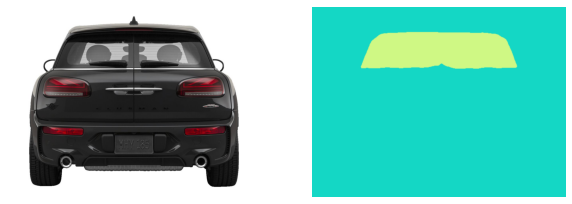

In [34]:
image = imread('/content/dataset/images_prepped_test/14092_st1280_119_1.jpg')
pred = imread('first_test.png')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.imshow(image)
ax1.axis('off')
ax2.imshow(pred)
ax2.axis('off');

In [36]:
!mkdir /mydrive/Biggie/Keras_SegNet/
